In [1]:
!pip install rdflib graphviz


[notice] A new release of pip is available: 24.3.1 -> 26.0.1
[notice] To update, run: pip install --upgrade pip


In [2]:
from rdflib import Graph, Literal, RDF, RDFS, Namespace, URIRef, SDO, XSD

# Helper function to add properties to a class
def add_properties(g, properties, domain_class):
    for prop  in properties:
        if len(prop) == 2:
            p, range_type = prop
            comment = None
        elif len(prop) == 3:
            p, range_type, comment = prop
        else:
            raise ValueError("Invalid property definition")
        g.add((p, RDF.type, RDF.Property))
        g.add((p, RDFS.domain, domain_class))
        g.add((p, RDFS.range, range_type))
        if comment is not None or comment != "":
                g.add((p, RDFS.comment, Literal(f"{comment}", datatype=XSD.string)))

# Namespaces
SCHEMA = Namespace("http://schema.org/")
KGS = Namespace("http://kg-course.io/food-nutrition/schema/")
BASE = Namespace("http://kg-course.io/food-nutrition/")

g = Graph()
g.bind("schema", SCHEMA)
g.bind("kgs", KGS)
g.bind("base", BASE)

# Define the classes
g.add((SDO.Restaurant, RDF.type, RDFS.Class)) # Restaurant class
g.add((SDO.Recipe, RDF.type, RDFS.Class)) # Recipe class
g.add((SDO.NutritionInformation, RDF.type, RDFS.Class)) # NutritionInformation class
g.add((SDO.Review, RDF.type, RDFS.Class)) # Review class
g.add((KGS.extractedIngredient, RDF.type, RDFS.Class)) # Class for ingredients extracted from unstructured data

# Restaurant properties
restaurant_properties = [
    (SDO.name, XSD.string),
    (SDO.addressLocality, XSD.string),
    (SDO.servesCuisine, XSD.string),
    (SDO.currenciesAccepted, XSD.string),
    (KGS.hasOnlineDelivery, XSD.boolean),
    (SDO.starRating, XSD.decimal),
    (KGS.averageCostOfTwo, XSD.decimal),
]
add_properties(g, restaurant_properties, SDO.Restaurant)

# Nutrition properties
nutrition_properties = [
    (SDO.calories, XSD.decimal),
    (SDO.carbohydrateContent, XSD.decimal),
    (SDO.cholesterolContent, XSD.decimal),
    (SDO.fatContent, XSD.decimal),
    (SDO.fiberContent, XSD.decimal),
    (SDO.proteinContent, XSD.decimal),
    (SDO.saturatedFatContent, XSD.decimal),
    (SDO.sodiumContent, XSD.decimal),
    (SDO.sugarContent, XSD.decimal)
]
add_properties(g, nutrition_properties, SDO.NutritionInformation)

# Recipe properties
recipe_properties = [
    (SDO.name, XSD.string),
    (SDO.cookTime, XSD.decimal, "The cooking time in minutes"),
    (SDO.prepTime, XSD.decimal, "The preparation time in minutes"),
    (SDO.recipeCategory, XSD.string),
    (SDO.recipeIngredient, XSD.string),
    (SDO.recipeInstructions, XSD.string),
    (SDO.keywords, XSD.string),
    (KGS.hasNutrition, SDO.NutritionInformation, "Nutrition information for the recipe"),
    (KGS.hasReview, SDO.Review, "Reviews for the recipe"),
    (SDO.aggregateRating, XSD.decimal),
    (SDO.image, XSD.anyURI),
    (SDO.datePublished, XSD.dateTime),
    (SDO.recipeCuisine, XSD.string)
]
add_properties(g, recipe_properties, SDO.Recipe)

# Review properties
review_properties = [
    (SDO.author, XSD.string),
    (SDO.reviewBody, XSD.string),
    (SDO.datePublished, XSD.dateTime),
    (SDO.dateModified, XSD.dateTime),
    (KGS.hasSentiment, XSD.float),
    (KGS.hasExtractedIngredients, KGS.extractedIngredient)
]
add_properties(g, review_properties, SDO.Review)

g.serialize(destination='vocabulary.ttl', format="ttl")

print("Vocabulary defined")

Vocabulary defined


In [3]:
print(g.serialize(format='ttl'))

@prefix kgs: <http://kg-course.io/food-nutrition/schema/> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix schema: <https://schema.org/> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

kgs:extractedIngredient a rdfs:Class .

schema:NutritionInformation a rdfs:Class .

schema:Recipe a rdfs:Class .

schema:Restaurant a rdfs:Class .

schema:Review a rdfs:Class .

kgs:averageCostOfTwo a rdf:Property ;
    rdfs:comment "None"^^xsd:string ;
    rdfs:domain schema:Restaurant ;
    rdfs:range xsd:decimal .

kgs:hasExtractedIngredients a rdf:Property ;
    rdfs:comment "None"^^xsd:string ;
    rdfs:domain schema:Review ;
    rdfs:range kgs:extractedIngredient .

kgs:hasNutrition a rdf:Property ;
    rdfs:comment "Nutrition information for the recipe"^^xsd:string ;
    rdfs:domain schema:Recipe ;
    rdfs:range schema:NutritionInformation .

kgs:hasOnlineDelivery a rdf:Property ;
    rdfs:comment "None"^^xsd:stri

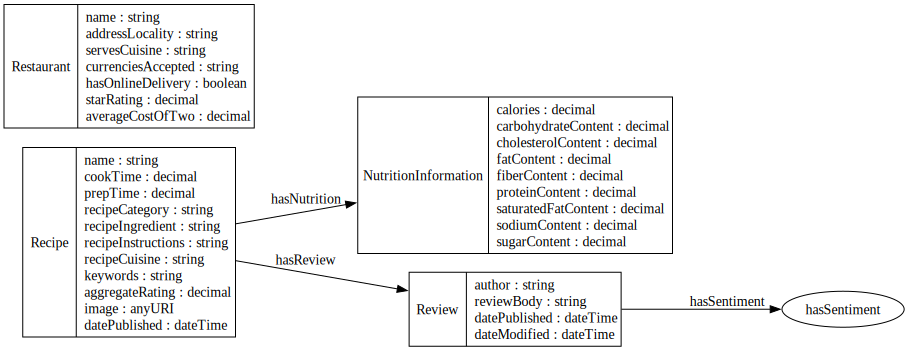

In [4]:
from graphviz import Digraph

dot = Digraph(comment="Food-nutrition kg schema")
dot.attr(rankdir="LR")  # left to right layout


dot.node("Recipe", """{
Recipe|
name : string\\l
cookTime : decimal\\l
prepTime : decimal\\l
recipeCategory : string\\l
recipeIngredient : string\\l
recipeInstructions : string\\l
recipeCuisine : string\\l
keywords : string\\l
aggregateRating : decimal\\l
image : anyURI\\l
datePublished : dateTime\\l
}""", shape="record")

dot.node("NutritionInformation", """{
NutritionInformation|
calories : decimal\\l
carbohydrateContent : decimal\\l
cholesterolContent : decimal\\l
fatContent : decimal\\l
fiberContent : decimal\\l
proteinContent : decimal\\l
saturatedFatContent : decimal\\l
sodiumContent : decimal\\l
sugarContent : decimal\\l
}""", shape="record")

dot.node("Restaurant", """{
Restaurant|
name : string\\l
addressLocality : string\\l
servesCuisine : string\\l
currenciesAccepted : string\\l
hasOnlineDelivery : boolean\\l
starRating : decimal\\l
averageCostOfTwo : decimal\\l
}""", shape="record")

dot.node("Review", """{
Review|
author : string\\l
reviewBody : string\\l
datePublished : dateTime\\l
dateModified : dateTime\\l
}""", shape="record")

dot.edge("Recipe", "NutritionInformation", label="hasNutrition")
dot.edge("Recipe", "Review", label="hasReview")
dot.edge("Review", "hasSentiment", label="hasSentiment")

# render
dot.render()
dot